# Interactive predictive model fitting for classifying case/control  

Quang Nguyen   
Last updated 2022-05-03

In [1]:
import numpy as np 
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import KFold, cross_val_score, cross_validate, train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score, brier_score_loss, roc_auc_score
from sklearn.inspection import permutation_importance
from skbio.stats.composition import clr, multiplicative_replacement
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import pickle
import timeit

Loading custom functions from the `pred_eval` model

In [2]:
sys.path.insert(1, '../python/')
from pred_eval import prior_preprocess, clr_transform, create_pipeline

In [3]:
np.random.seed(160497)

## Example using IBD pathways data 

In [4]:
feat = pd.read_csv("../data/trait_ibd_16s_feat.csv", index_col = 0)
lab = pd.read_csv("../data/pred_picrust2_ibd_metadata.csv", index_col = 0)
lab.diseasesubtype.value_counts()

CD    339
no    194
Name: diseasesubtype, dtype: int64

In [7]:
feat = pd.read_csv("../data/pred_pathway_ibd_feat.csv", index_col=0)
lab = pd.read_csv("../data/pred_pathway_ibd_metadata.csv", index_col=0)

In [10]:
X, y = prior_preprocess(feat, lab, "diseasesubtype", "CD")
pipe = create_pipeline(False)
pipe

Pipeline(steps=[('calib_rf',
                 CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_features='sqrt',
                                                                              n_estimators=500),
                                        cv=5))])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
fitted_mod = pipe.fit(X_train, y_train)

In [13]:
r = permutation_importance(fitted_mod, X_test, y_test, n_repeats = 2, n_jobs = 2, scoring = "roc_auc")

In [29]:
sorted_idx = r.importances_mean.argsort()[range(0,15)]
importances = r.importances[sorted_idx].T
labels = feat.columns[sorted_idx]
pd.DataFrame(importances, columns =labels)

,bacillus;cell_shape,glucose;substrate,melibiose;substrate,maltose;substrate,leucine;substrate,succinate;substrate,propionate;substrate,adonitol;substrate,sucrose;substrate,fructose;substrate,fucose;substrate,acetate;substrate,pleomorphic;cell_shape,arginine;substrate,tween_40;substrate
0,-0.007092,-0.008560,-0.006359,-0.010027,-0.007337,-0.007337,-0.005136,-0.004402,-0.006114,-0.005136,-0.003668,-0.004157,-0.004157,-0.003424,-0.004647
1,-0.007826,-0.004647,-0.006848,-0.001467,-0.004157,-0.003913,-0.006114,-0.005380,-0.002446,-0.002935,-0.004402,-0.003668,-0.003668,-0.004157,-0.001223


In [28]:
type(importances)

numpy.ndarray

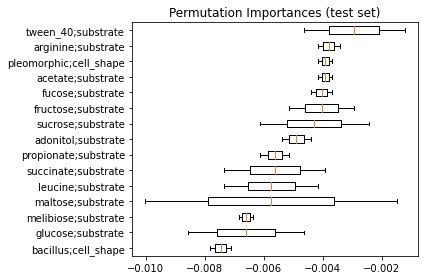

In [22]:
#sorted_idx = r.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    r.importances[sorted_idx].T, vert=False, labels=feat.columns[sorted_idx]
)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

## Calibration curves

In [ ]:
y_pred = fitted_mod.predict_proba()

In [ ]:
help(fitted_mod.predict_proba)

# Performing the same analysis for other datasets